In [1]:
print("hello world")

hello world


# Normalization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv("wine_data.csv",header=None,usecols=[0,1,2])
df.columns = ["a","b","c"]

In [4]:
df

,a,b,c
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='b', ylabel='Density'>

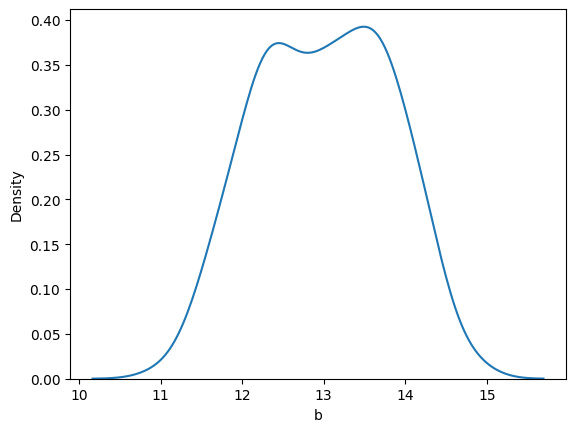

In [5]:
sns.kdeplot(df["b"])

<Axes: xlabel='c', ylabel='Density'>

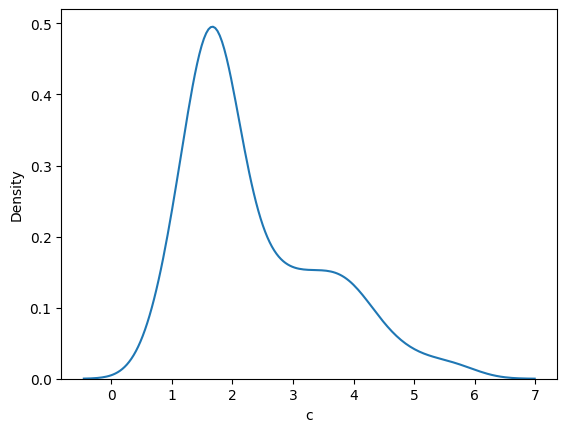

In [6]:
sns.kdeplot(df["c"])

<Axes: xlabel='b', ylabel='c'>

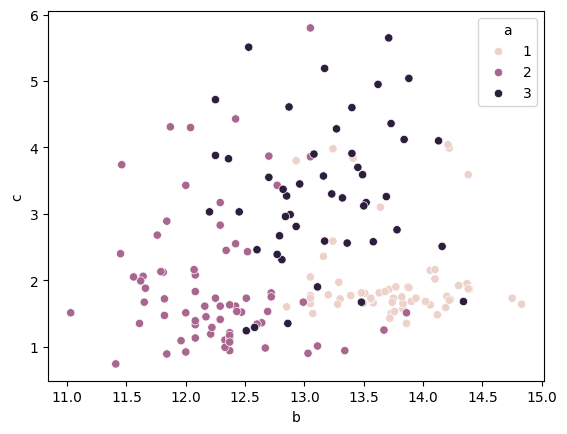

In [7]:
sns.scatterplot(data=df,x="b",y="c",hue="a")

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df.drop("a",axis=1),df["a"],test_size=0.3,random_state=0)


In [21]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [22]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_train.columns)

In [24]:
np.round(x_train_scaled.describe(),1)

,b,c
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


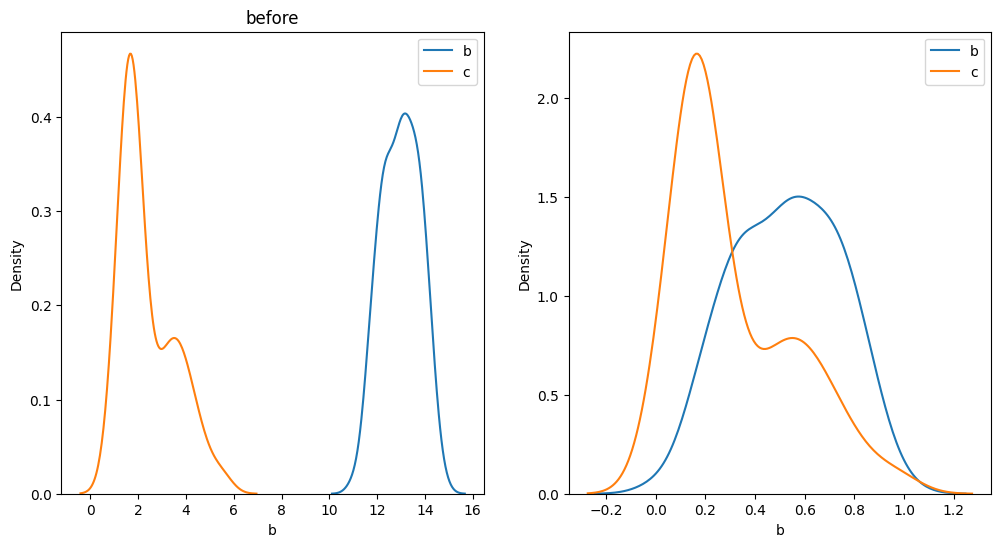

In [27]:
fig, (ax1,ax2)= plt.subplots(ncols=2,figsize=(12,6))

ax1.set_title("before")
sns.kdeplot(x_train["b"],ax=ax1,label="b")
sns.kdeplot(x_train["c"],ax=ax1,label="c")
ax1.legend()

ax1.set_title("before")
sns.kdeplot(x_train_scaled["b"],ax=ax2,label="b")
sns.kdeplot(x_train_scaled["c"],ax=ax2,label="c")

plt.legend()
plt.show()